# Bildemanipulering

https://pdfs.semanticscholar.org/0f1e/866c3acb8a10f96b432e86f8a61be5eb6799.pdf


Filen er funnet https://realpython.com/face-recognition-with-python/

Mer her: https://docs.opencv.org/3.3.0/d7/d8b/tutorial_py_face_detection.html

In [2]:
import cv2
import module_update

import nbpictures as nbp
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
#import cv2
import numpy as np

Updated file nbtext.py
Updated file nbpictures.py


In [82]:
def mplot(image_as_array, x=12, y=12):
    fig, ax = plt.subplots(figsize=(x, y))
    plt.imshow(image_as_array)


In [23]:
def censor_features(image):
    from skimage import transform as tf
    from skimage.feature import CENSURE
    from skimage.color import rgb2gray


    img_orig = rgb2gray(image)
   
    detector = CENSURE()

    fig, ax = plt.subplots(figsize=(12, 6))

    detector.detect(img_orig)

    ax.imshow(img_orig, cmap=plt.cm.gray)
    ax.scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
                  2 ** detector.scales, facecolors='none', edgecolors='r')

    plt.show()
    return detector

In [10]:
def censor_features_example(image):
    from skimage import transform as tf
    from skimage.feature import CENSURE
    from skimage.color import rgb2gray


    img_orig = rgb2gray(image)
    tform = tf.AffineTransform(scale=(1.5, 1.5), rotation=0.5,
                               translation=(150, -200))
    img_warp = tf.warp(img_orig, tform)

    detector = CENSURE()

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    detector.detect(img_orig)

    ax[0].imshow(img_orig, cmap=plt.cm.gray)
    ax[0].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
                  2 ** detector.scales, facecolors='none', edgecolors='r')
    ax[0].set_title("Original Image")

    detector.detect(img_warp)

    ax[1].imshow(img_warp, cmap=plt.cm.gray)
    ax[1].scatter(detector.keypoints[:, 1], detector.keypoints[:, 0],
                  2 ** detector.scales, facecolors='none', edgecolors='r')
    ax[1].set_title('Transformed Image')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

# Konturer


In [4]:
bilder = nbp.find_urls('Oslo, vinter')

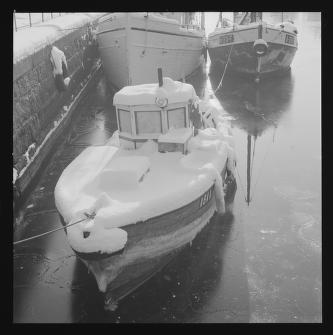

In [5]:
img = nbp.get_picture_from_url(bilder[3], height=500)
nb_image = np.array(img)
Image.fromarray(nb_image)

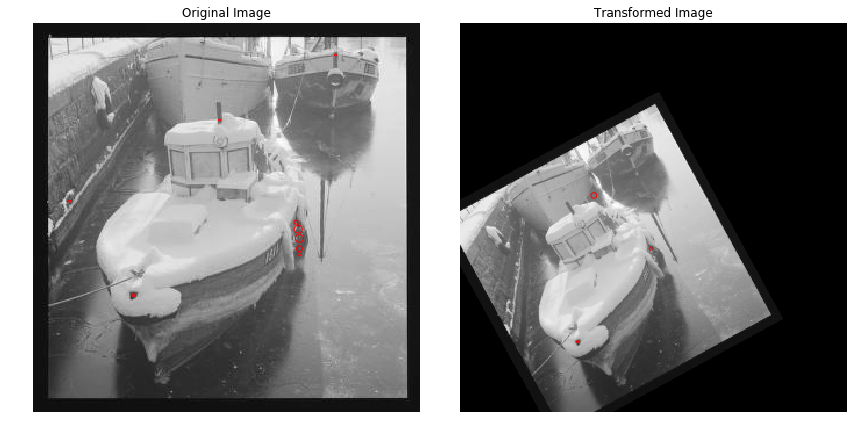

In [12]:
censor_features_example(nb_image)

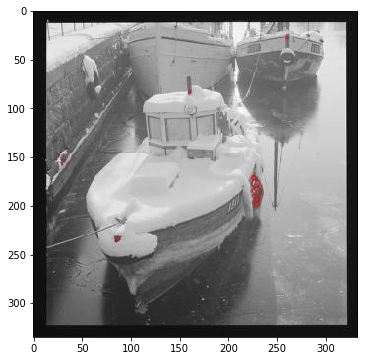

In [24]:
fs = censor_features(nb_image)

In [28]:
fs.scales

array([2, 2, 2, 4, 6, 6, 5, 4, 3], dtype=int64)